### Cine.ar 

___Horas Vistas:___ Cantidad de tiempo, medido en horas, que se ve la plataforma en un período determinado.

___Visualizaciones Totales:___ Cantidad  de visualizaciones en un período, independiente del usuario que lo haga.

___Usuarios únicos:___ Un usuario puede realizar muchas visualizaciones de un mismo contenido o diferentes. 

In [1]:
import pandas as pd

data1 = pd.read_csv("cinear-total-horas-vistas-2022-07_v1.csv")
data1["indice_tiempo"] = pd.to_datetime(data1["indice_tiempo"])
data1.sort_values("indice_tiempo").set_index("indice_tiempo")

data2 = pd.read_csv("cinear-usuarios-unicos-visualizaciones-2022-07_v1.csv")
data2["indice_tiempo"] = pd.to_datetime(data2["indice_tiempo"])
data2.sort_values("indice_tiempo").set_index("indice_tiempo")

data3 = pd.read_csv("cinear-visualizaciones-totales-2022-07_v1.csv")
data3["indice_tiempo"] = pd.to_datetime(data3["indice_tiempo"])
data3.sort_values("indice_tiempo").set_index("indice_tiempo")


,visualizaciones_totales
indice_tiempo,
2015-11-01,175312
2015-12-01,388344
2016-01-01,196010
2016-02-01,118493
2016-03-01,88194
...,...
2022-02-01,108375
2022-03-01,114228
2022-04-01,116525


In [2]:
data1

,indice_tiempo,total_horas_vistas
0,2015-11-01,69756
1,2015-12-01,221281
2,2016-01-01,126343
3,2016-02-01,80314
4,2016-03-01,57405
...,...,...
75,2022-02-01,62284
76,2022-03-01,67872
77,2022-04-01,65915
78,2022-05-01,67146


In [3]:
cinear = pd.concat([data1["indice_tiempo"], data1["total_horas_vistas"], data2["usuarios_unicos_con_visualizaciones"],
                    data3["visualizaciones_totales"]], axis=1)
cinear

,indice_tiempo,total_horas_vistas,usuarios_unicos_con_visualizaciones,visualizaciones_totales
0,2015-11-01,69756,79539,175312
1,2015-12-01,221281,101507,388344
2,2016-01-01,126343,50399,196010
3,2016-02-01,80314,30601,118493
4,2016-03-01,57405,27022,88194
...,...,...,...,...
75,2022-02-01,62284,38537,108375
76,2022-03-01,67872,40148,114228
77,2022-04-01,65915,42408,116525
78,2022-05-01,67146,43579,119085


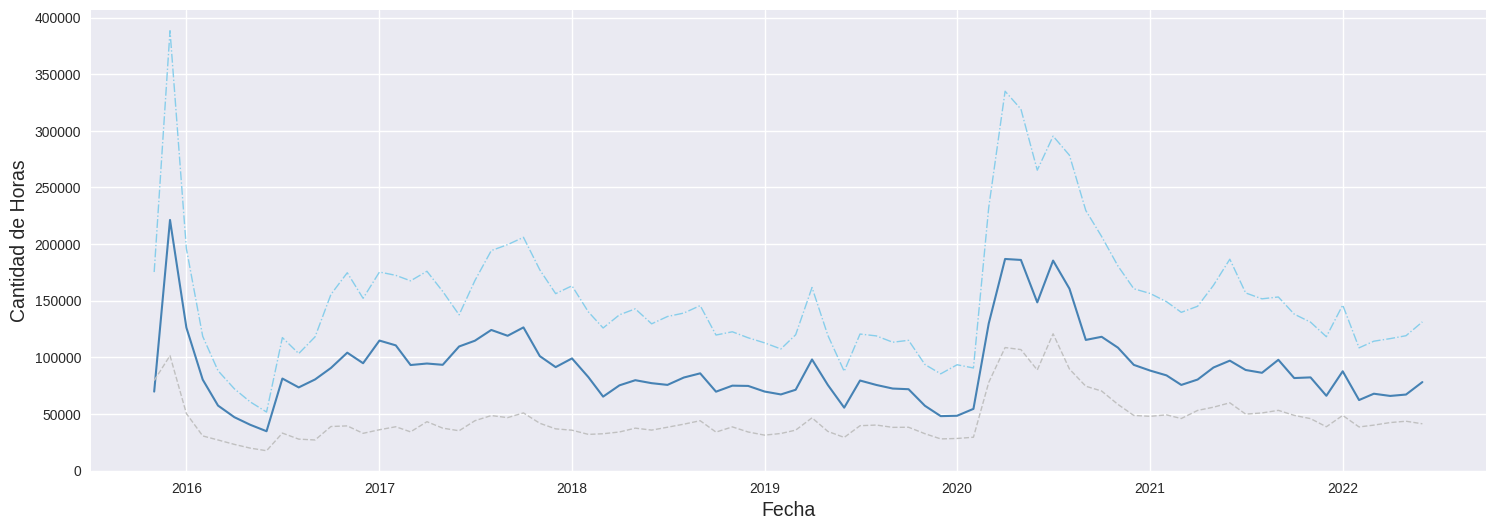

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
plt.style.use("seaborn")
f1 = plt.plot(cinear.indice_tiempo, cinear.total_horas_vistas, c="steelblue", ls="solid", lw=1.5)
f2 = plt.plot(cinear.indice_tiempo, cinear.usuarios_unicos_con_visualizaciones, c="silver", ls="--", lw=1)
f3 = plt.plot(cinear.indice_tiempo, cinear.visualizaciones_totales, c="skyblue", ls="-.", lw=1)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Cantidad de Horas", fontsize=14)

#plt.savefig("CineAr.jpg", bbox_inches='tight')
plt.show()

Text(2020-03-24, 40000, 'Cuarentena \n  estricta')

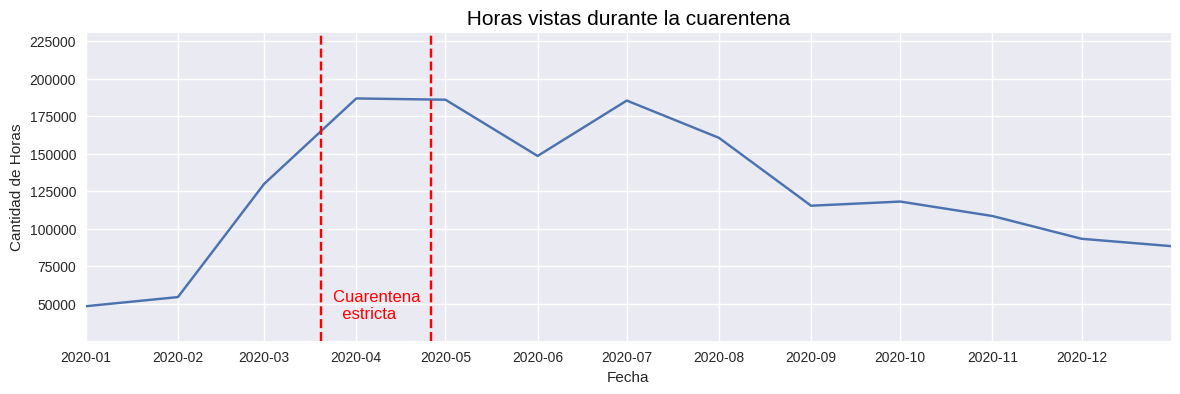

In [5]:
import datetime as dt

plt.figure(figsize=(14,4))
plt.style.use("seaborn")
plt.plot(data1.indice_tiempo, data1.total_horas_vistas)
plt.xlim([dt.date(2020,1,1), dt.date(2020,12,31)])
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Horas")
plt.title(" Horas vistas durante la cuarentena ", color="black", size=15)

#El ASPO abarcó inicialmente todo el territorio del país desde el 20 de marzo hasta el 26 de abril inclusive
plt.axvline(x=dt.date(2020,3,20), ymin=0, c="red", ls="--")
plt.axvline(x=dt.date(2020,4,26), ymin=0, c="red", ls="--")
plt.text(dt.date(2020,3,24), 40000, "Cuarentena \n  estricta", fontsize=12, c="red")


In [6]:
cinear.describe()

,total_horas_vistas,usuarios_unicos_con_visualizaciones,visualizaciones_totales
count,80.000000,80.000000,80.000000
mean,90792.512500,45789.700000,153088.487500
std,33499.493421,20183.489692,59005.789042
min,34752.000000,17544.000000,51699.000000
25%,71727.000000,34087.000000,118184.500000
50%,82225.500000,39548.000000,141468.500000
75%,99541.750000,48840.750000,172950.000000
max,221281.000000,120776.000000,388344.000000
